In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Data Cleaning

In [70]:
bone_marrow_df = pd.read_csv('/content/drive/MyDrive/bone_marrow.csv')

in_row, in_col = bone_marrow_df.shape
print("\nInitial Dataset size: " + str(in_row) + " rows, " + str(in_col) + " columns")

null_count = bone_marrow_df.isnull().sum().sum()
if null_count > 0:
  print("\nThere are " + str(null_count) + " null values found!")
  bone_marrow_df.dropna(inplace=True)
  print("The null values have been dropped.")

duplicates = bone_marrow_df.duplicated().sum()
if duplicates > 0:
  print("\nThere are " + str(duplicates) + " duplicates found!")
  bone_marrow_df.drop_duplicates(inplace=True)
  print("The duplicated rows have been dropped.")

cleaned_row, cleaned_col = bone_marrow_df.shape

print("\nDATASET INFORMATION AFTER CLEANING:")
print(bone_marrow_df.info())

print("\nSUMMARY STATISTICS AFTER CLEANING:")
print(bone_marrow_df.describe())

print("\nUpdated Dataset size: " + str(cleaned_row) + " rows, " + str(cleaned_col) + " columns")


Initial Dataset size: 187 rows, 37 columns

There are 81 null values found!
The null values have been dropped.

DATASET INFORMATION AFTER CLEANING:
<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 185
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       142 non-null    int64  
 1   Stemcellsource        142 non-null    int64  
 2   Donorage              142 non-null    float64
 3   Donorage35            142 non-null    int64  
 4   IIIV                  142 non-null    int64  
 5   Gendermatch           142 non-null    int64  
 6   DonorABO              142 non-null    int64  
 7   RecipientABO          142 non-null    float64
 8   RecipientRh           142 non-null    float64
 9   ABOmatch              142 non-null    float64
 10  CMVstatus             142 non-null    float64
 11  DonorCMV              142 non-null    float64
 12  RecipientCMV          142 non-nu

Central Tendencies

In [71]:
print("Central Tendency Measures:")
print("Mean:\n", bone_marrow_df.mean())
print("Median:\n", bone_marrow_df.median())

Central Tendency Measures:
Mean:
 Recipientgender              0.612676
Stemcellsource               0.816901
Donorage                    32.931082
Donorage35                   0.408451
IIIV                         0.612676
Gendermatch                  0.169014
DonorABO                     0.366197
RecipientABO                 0.260563
RecipientRh                  0.830986
ABOmatch                     0.704225
CMVstatus                    1.535211
DonorCMV                     0.401408
RecipientCMV                 0.584507
Disease                      2.302817
Riskgroup                    0.366197
Txpostrelapse                0.119718
Diseasegroup                 0.823944
HLAmatch                     0.676056
HLAmismatch                  0.147887
Antigen                     -0.063380
Allele                      -0.246479
HLAgrI                       1.232394
Recipientage                 9.458451
Recipientage10               0.450704
Recipientageint              1.190141
Relapse         

Evaluation of Models

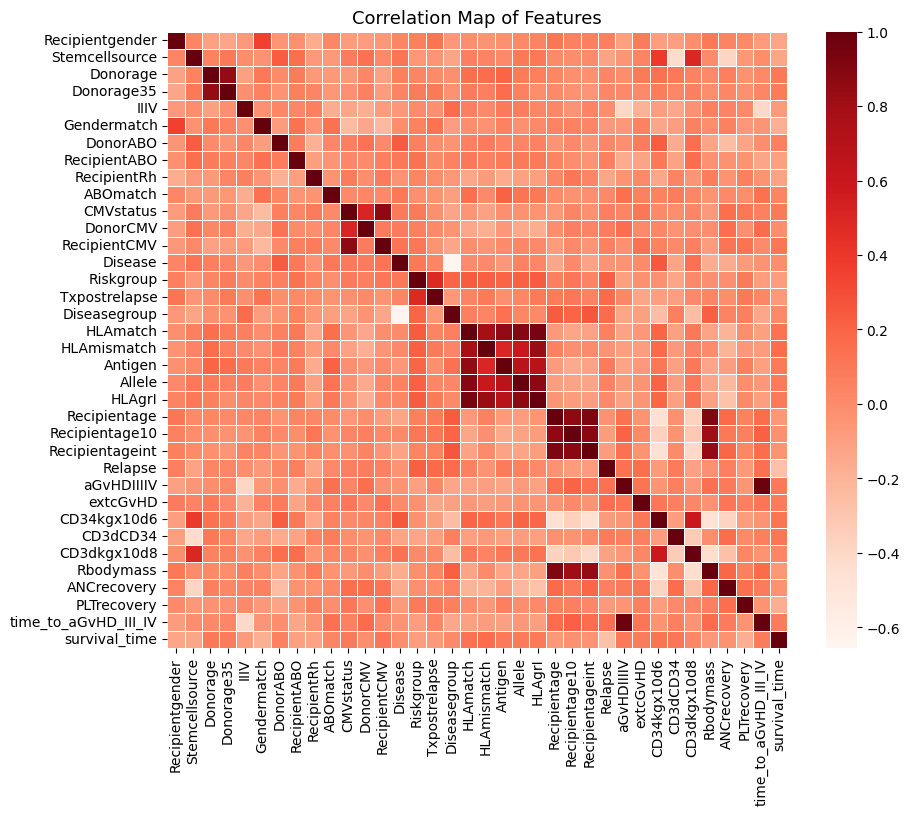

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


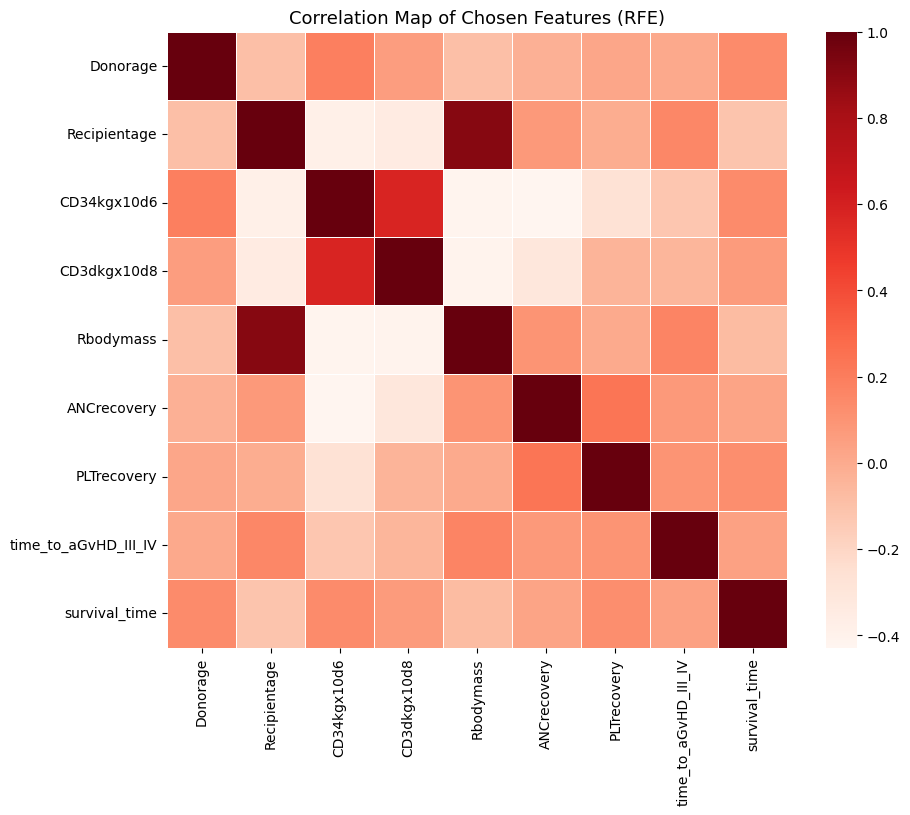

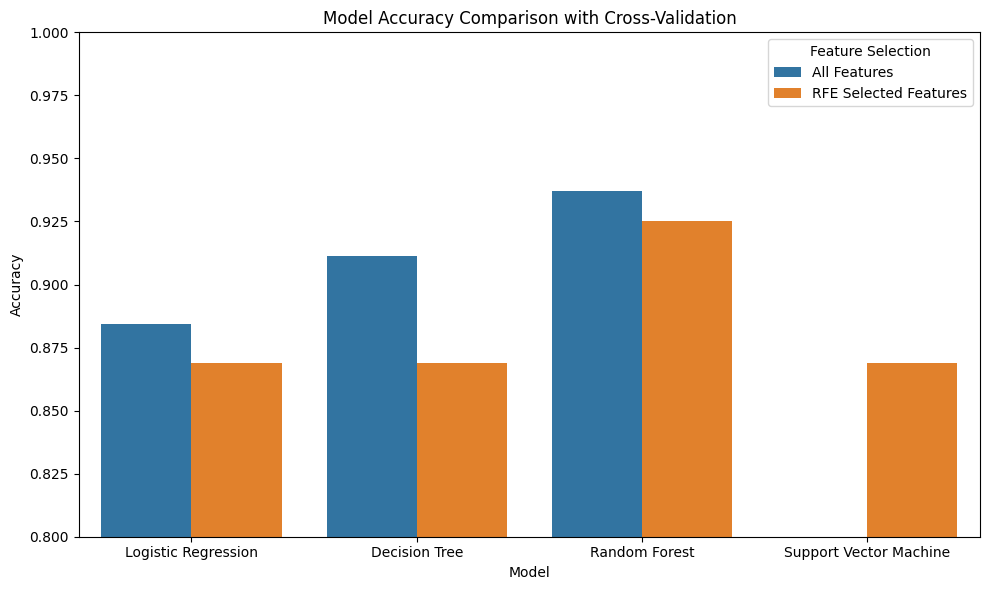

In [76]:
state = 42

feature_names = ['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
       'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
       'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
       'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Allele', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
       'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
       'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'survival_status']

plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(), annot = False, cmap='Reds', linewidths = .5)
plt.title('Correlation Map of Features', fontsize=13)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=state)

rfe = RFE(model_one, n_features_to_select=9)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfe.fit(X_train, y_train)

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

z_scores = np.abs(stats.zscore(X_train_selected))
threshold = 3
X_train_no_outliers = X_train_selected[(z_scores < threshold).all(axis=1)]
y_train_no_outliers = y_train[(z_scores < threshold).all(axis=1)]

chosen_features = pd.DataFrame(X_train_no_outliers, columns=[feature_names[i] for i, chosen in enumerate(rfe.support_) if chosen])

plt.figure(figsize=(10, 8))
sns.heatmap(chosen_features.corr(), annot = False, cmap='Reds', linewidths = .5)
plt.title('Correlation Map of Chosen Features (RFE)', fontsize=13)
plt.show()

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=state),
    "Decision Tree": DecisionTreeClassifier(random_state=state),
    "Random Forest": RandomForestClassifier(random_state=state),
    "Support Vector Machine": SVC(random_state=state)
}

crossval_folds = 5

all_features_results = {}
for name, model in models.items():
  crossVal_scores = cross_val_score(model, X_train_scaled, y_train, cv=crossval_folds, scoring = 'accuracy')
  all_features_results[name] = np.mean(crossVal_scores)

rfe_features_results = {}
for name, model in models.items():
  crossVal_scores = cross_val_score(model, X_train_no_outliers, y_train_no_outliers, cv=crossval_folds, scoring = 'accuracy')
  rfe_features_results[name] = np.mean(crossVal_scores)

results_df = pd.DataFrame({
    "Model": list(all_features_results.keys()) + list(rfe_features_results.keys()),
    "Accuracy": list(all_features_results.values()) + list(rfe_features_results.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison with Cross-Validation')
plt.ylim(0.8, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()

## ACCURACY

In [77]:
print("Accuracy scores for models trained with all of the features:")
for name, score in all_features_results.items():
    print(f"{name}: {score:.4f}")

print("\nAccuracy scores for models trained with RFE-selected features:")
for name, score in rfe_features_results.items():
    print(f"{name}: {score:.4f}")

Accuracy scores for models trained with all of the features:
Logistic Regression: 0.8842
Decision Tree: 0.9115
Random Forest: 0.9372
Support Vector Machine: 0.7605

Accuracy scores for models trained with RFE-selected features:
Logistic Regression: 0.8688
Decision Tree: 0.8688
Random Forest: 0.9251
Support Vector Machine: 0.8688


MODEL EVALUATION ENSEMBLE TECHNIQUES

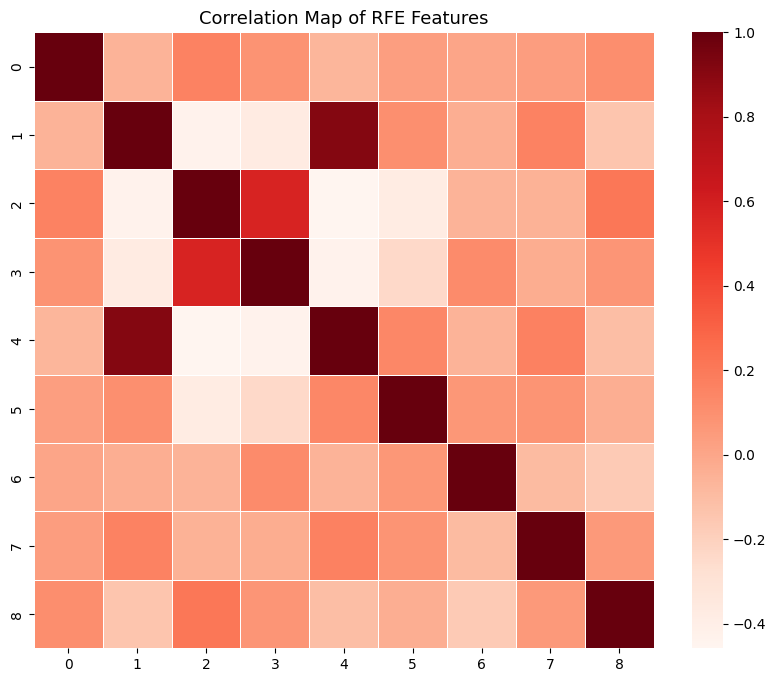

Accuracy scores for models with RFE-selected features:
Logistic Regression: 0.8755
Decision Tree: 0.8842
Random Forest: 0.9285
Support Vector Machine: 0.8221
Stacking: 0.9107
AdaBoost: 0.8842
Bagging: 0.9107
Boosting: 0.8937


<ipython-input-78-cb58ff0d12ca>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette=colors)


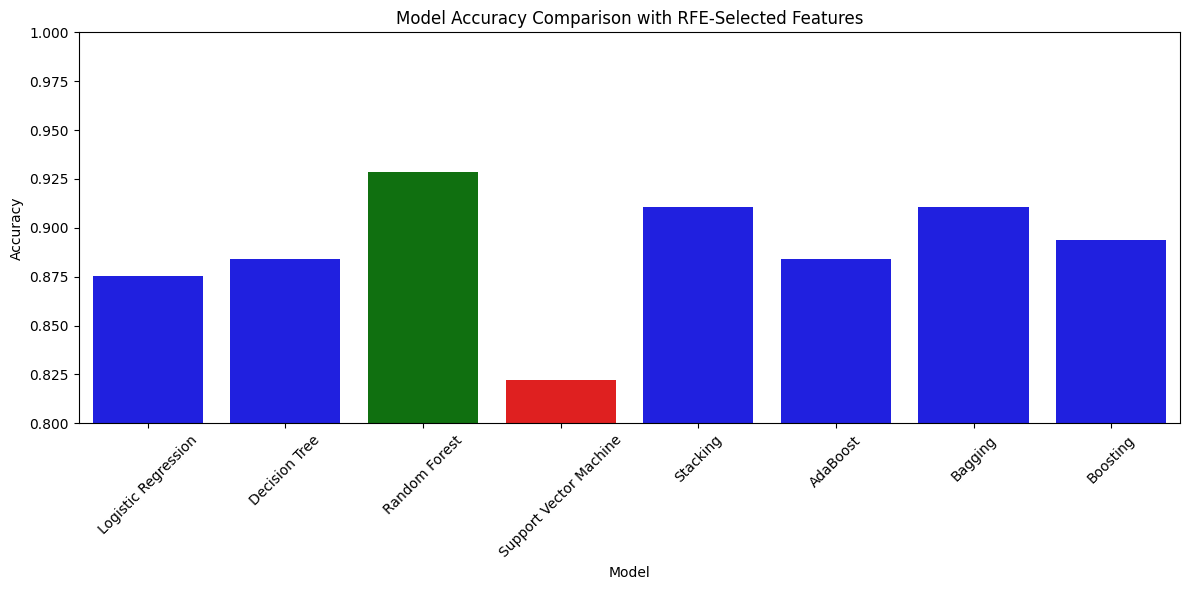

In [78]:
chosen_features_df = pd.DataFrame(X_train_selected)

plt.figure(figsize=(10, 8))
sns.heatmap(chosen_features_df.corr(), annot = False, cmap='Reds', linewidths = .5)
plt.title('Correlation Map of RFE Features', fontsize=13)
plt.show()

log_reg = LogisticRegression(max_iter=10000, random_state=state)
dec_tree = DecisionTreeClassifier(random_state=state)
rand_forest = RandomForestClassifier(random_state=state)
svc = SVC(probability=True, random_state=state)

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', log_reg),
        ('dt', dec_tree),
        ('rf', rand_forest),
        ('svc', svc)
    ],
    final_estimator=LogisticRegression(max_iter=10000, random_state=state)
)

ada_boost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=state),
    random_state=state
)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=state),
    random_state=state
)

gradient_boosting_clf = GradientBoostingClassifier(random_state=state)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "Random Forest": rand_forest,
    "Support Vector Machine": svc,
    "Stacking": stacking_clf,
    "AdaBoost": ada_boost_clf,
    "Bagging": bagging_clf,
    "Boosting": gradient_boosting_clf
}
cv_folds = 10

chosen_rfe_features_results = {}
for name, model in models.items():
    crossVal_scores = cross_val_score(model, X_train_selected, y_train, cv=crossval_folds, scoring='accuracy')
    chosen_rfe_features_results[name] = np.mean(crossVal_scores)

print("Accuracy scores for models with RFE-selected features:")
for name, score in chosen_rfe_features_results.items():
    print(f"{name}: {score:.4f}")

results_df = pd.DataFrame({
    "Model": list(chosen_rfe_features_results.keys()),
    "Accuracy": list(chosen_rfe_features_results.values())
})

max_accuracy = results_df['Accuracy'].max()
min_accuracy = results_df['Accuracy'].min()

plt.figure(figsize=(12, 6))
colors = ['red' if acc == min_accuracy else 'green' if acc == max_accuracy else 'blue' for acc in results_df['Accuracy']]
sns.barplot(data=results_df, x='Model', y='Accuracy', palette=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison with RFE-Selected Features')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()